In [23]:
##Traffic Time Analysis: Kadıköy – Beşiktaş Route

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set(style="whitegrid")


In [25]:
df = pd.read_csv("traffic_data-2.csv", header=None)
df.columns = ["Timestamp", "Origin", "Destination", "TravelDuration"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour
df["Date"] = df["Timestamp"].dt.date
df["Weekday"] = df["Timestamp"].dt.day_name()
df["TravelDurationMinutes"] = df["TravelDuration"].str.extract(r'(\d+)').astype(int)


In [26]:
def time_category(hour):
    if 6 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 16:
        return "Midday"
    else:
        return "Evening"

df["TimeCategory"] = df["Hour"].apply(time_category)
df["WeekdayNum"] = df["Weekday"].apply(lambda x: ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"].index(x))
df.tail(59)

,Timestamp,Origin,Destination,TravelDuration,Hour,Date,Weekday,TravelDurationMinutes,TimeCategory,WeekdayNum
0,2025-04-05 23:36:56,"Kadıköy, Istanbul","Beşiktaş, Istanbul",14 mins,23,2025-04-05,Saturday,14,Evening,5
1,2025-04-06 04:36:56,"Kadıköy, Istanbul","Beşiktaş, Istanbul",14 mins,4,2025-04-06,Sunday,14,Evening,6
2,2025-04-06 09:36:56,"Kadıköy, Istanbul","Beşiktaş, Istanbul",30 mins,9,2025-04-06,Sunday,30,Morning,6
3,2025-04-06 14:36:57,"Kadıköy, Istanbul","Beşiktaş, Istanbul",50 mins,14,2025-04-06,Sunday,50,Midday,6
4,2025-04-06 22:45:19,"Kadıköy, Istanbul","Beşiktaş, Istanbul",14 mins,22,2025-04-06,Sunday,14,Evening,6
5,2025-04-07 03:45:19,"Kadıköy, Istanbul","Beşiktaş, Istanbul",44 mins,3,2025-04-07,Monday,44,Evening,0
6,2025-04-07 08:45:20,"Kadıköy, Istanbul","Beşiktaş, Istanbul",42 mins,8,2025-04-07,Monday,42,Morning,0
7,2025-04-07 13:45:20,"Kadıköy, Istanbul","Beşiktaş, Istanbul",43 mins,13,2025-04-07,Monday,43,Midday,0
8,2025-04-07 20:23:33,"Kadıköy, Istanbul","Beşiktaş, Istanbul",15 mins,20,2025-04-07,Monday,15,Evening,0
9,2025-04-08 01:23:34,"Kadıköy, Istanbul","Beşiktaş, Istanbul",13 mins,1,2025-04-08,Tuesday,13,Evening,1


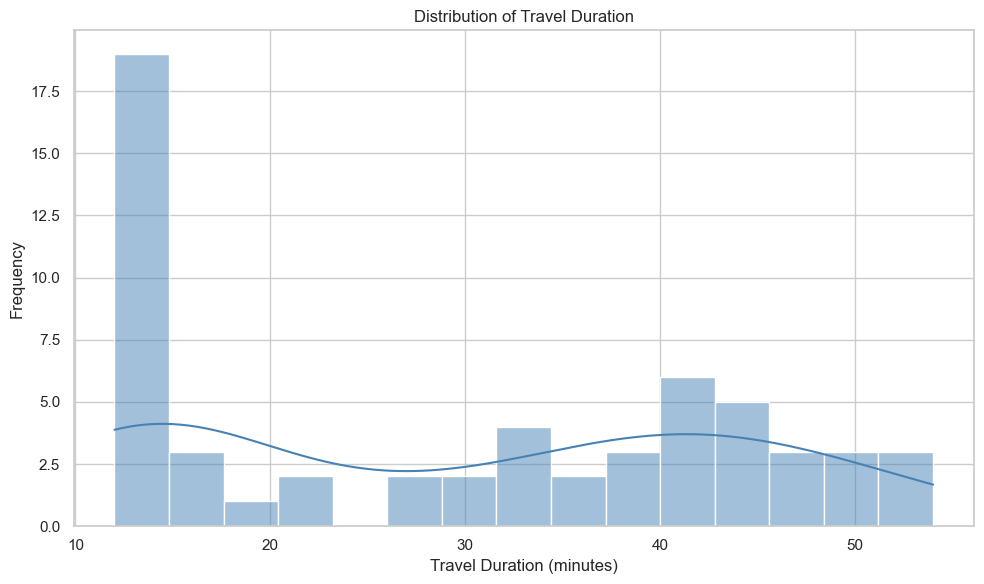

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TravelDurationMinutes"], bins=15, kde=True, color="steelblue")
plt.title("Distribution of Travel Duration")
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


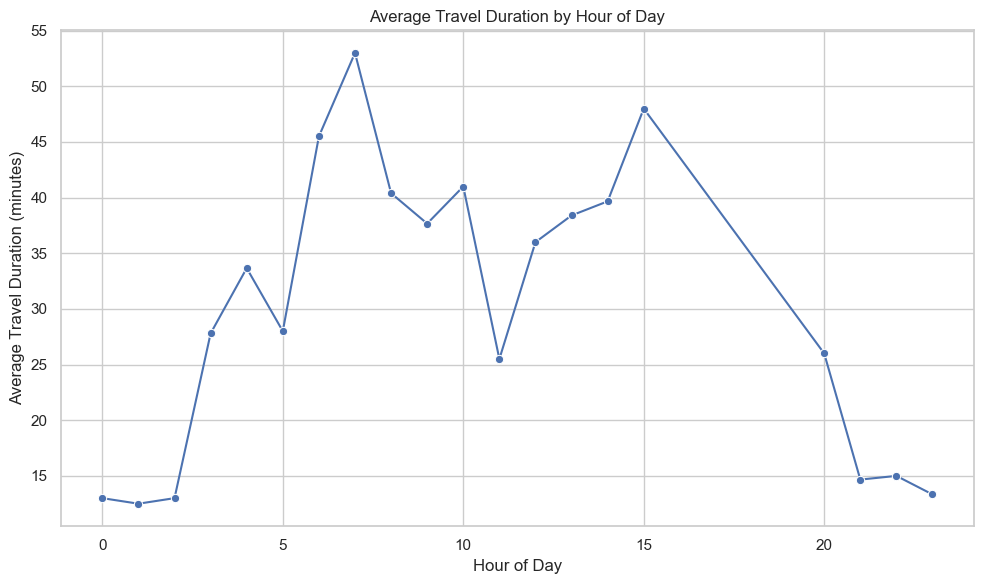

In [28]:
plt.figure(figsize=(10, 6))
hourly_avg = df.groupby("Hour")["TravelDurationMinutes"].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker="o")
plt.title("Average Travel Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Travel Duration (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


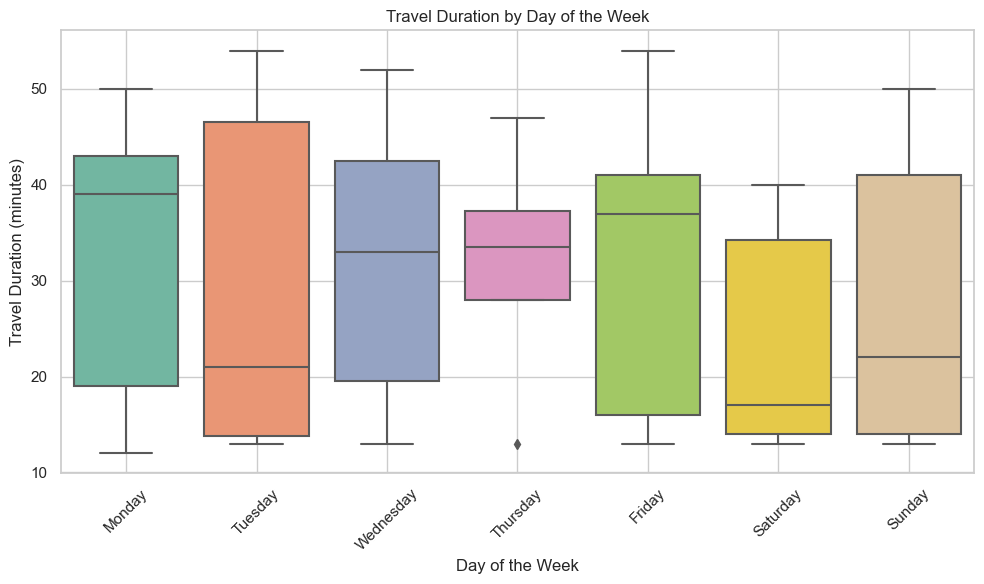

In [29]:
plt.figure(figsize=(10, 6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.boxplot(data=df, x="Weekday", y="TravelDurationMinutes", order=order, palette="Set2")
plt.title("Travel Duration by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Travel Duration (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


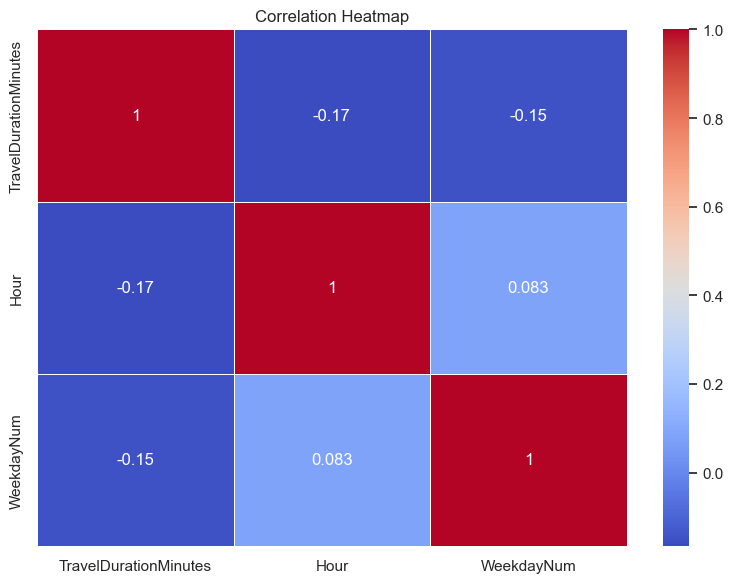

In [30]:
corr = df[["TravelDurationMinutes", "Hour", "WeekdayNum"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


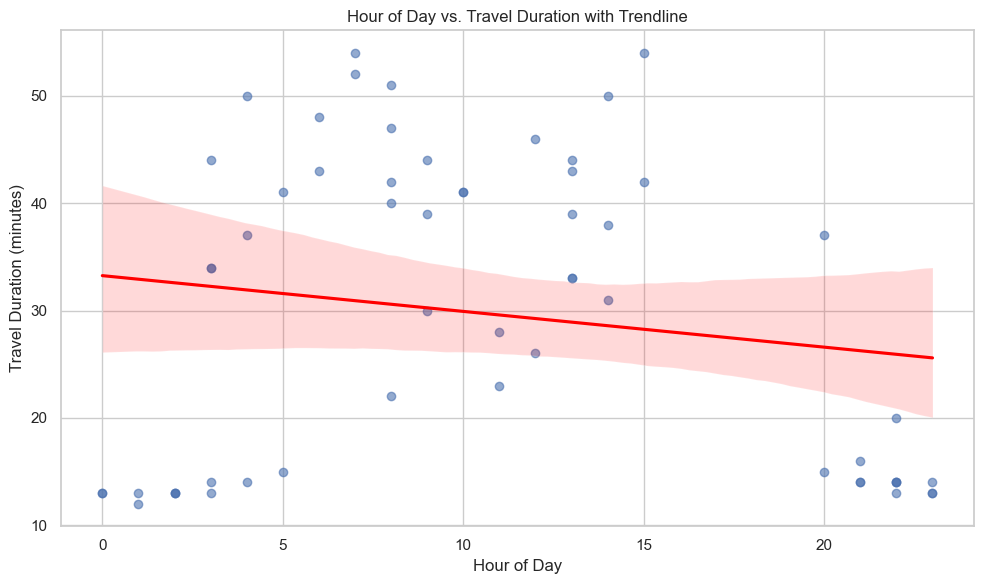

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Hour", y="TravelDurationMinutes", data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Hour of Day vs. Travel Duration with Trendline")
plt.xlabel("Hour of Day")
plt.ylabel("Travel Duration (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# ANOVA: Morning vs Midday vs Evening
morning = df[df["TimeCategory"] == "Morning"]["TravelDurationMinutes"]
midday = df[df["TimeCategory"] == "Midday"]["TravelDurationMinutes"]
evening = df[df["TimeCategory"] == "Evening"]["TravelDurationMinutes"]

anova_stat, anova_p = f_oneway(morning, midday, evening)

print("ANOVA Test Results:")
print(f"F-statistic: {anova_stat:.2f}")
print(f"P-value: {anova_p:.10f}")

if anova_p < 0.05:
    print("Result: Reject H₀. Travel durations differ significantly based on time of day.")
else:
    print("Result: Fail to reject H₀. No significant difference found based on time of day.")


ANOVA Test Results:
F-statistic: 28.58
P-value: 0.0000000031
Result: Reject H₀. Travel durations differ significantly based on time of day.
